# Import lib


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [4]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.shape

(150, 6)

# Choose a classification dataset and normalize features.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Iris.csv')

# Drop ID column if it exists
df.drop(columns=['Id'], inplace=True)

# Encode the target variable (Species) to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])  # 0 = Setosa, 1 = Versicolor, 2 = Virginica

# Separate features and target
X = df.drop('Species', axis=1).values
y = df['Species'].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Display first 5 rows of normalized features
print("First 5 rows of normalized features:")
print(X_normalized[:5])


First 5 rows of normalized features:
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


# Use KNeighborsClassifier from sklearn.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Step 2.1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42
)

# Step 2.2: Initialize and train KNN classifier (start with k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 2.3: Make predictions
y_pred = knn.predict(X_test)

# Display first 5 predictions
print("First 5 predictions:", y_pred)
print("Actual labels     :", y_test[:5])


First 5 predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Actual labels     : [1 0 2 1 1]


# .Experiment with different values of K

In [5]:
from sklearn.metrics import accuracy_score

# Try different values of k
k_values = [1, 3, 5, 7, 9]

print("Accuracy for different values of K:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy: {acc:.2f}")


Accuracy for different values of K:
K = 1 → Accuracy: 0.98
K = 3 → Accuracy: 1.00
K = 5 → Accuracy: 1.00
K = 7 → Accuracy: 1.00
K = 9 → Accuracy: 1.00


# .Evaluate model using accuracy, confusion matrix

Accuracy (K=3): 1.00


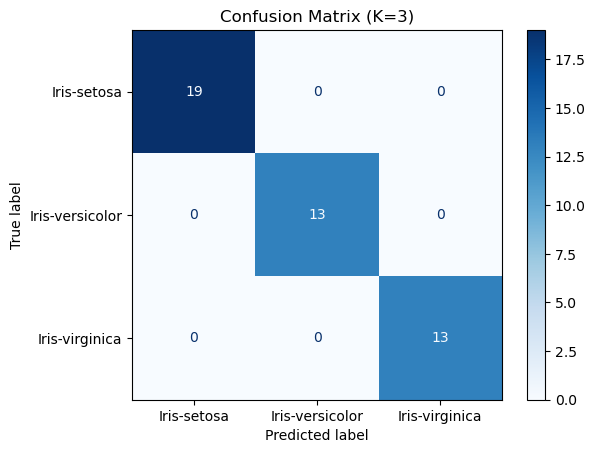

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Choose K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (K={k}): {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={k})')
plt.show()


#  Visualize decision boundaries.

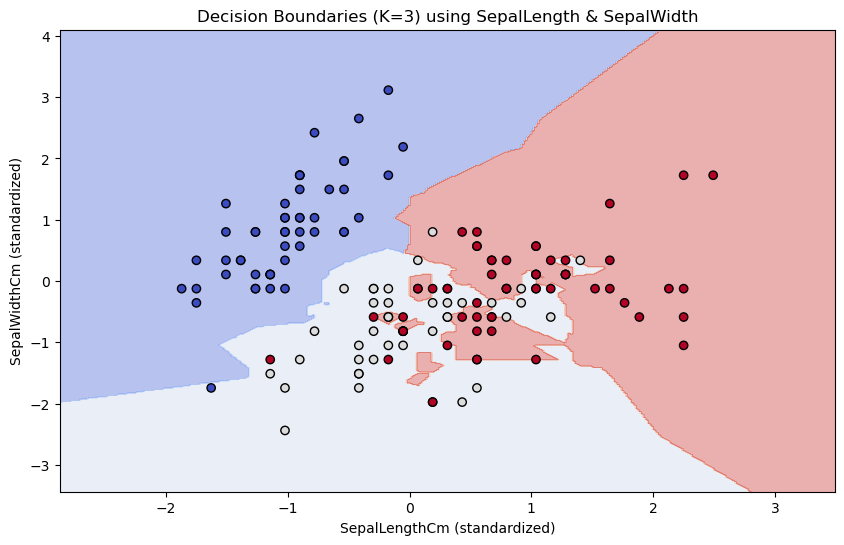

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Use only 2 features for plotting: SepalLengthCm and SepalWidthCm
X_plot = df[['SepalLengthCm', 'SepalWidthCm']].values
y_plot = df['Species'].values

# Normalize selected features
scaler_2d = StandardScaler()
X_plot_scaled = scaler_2d.fit_transform(X_plot)

# Train-test split
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_plot_scaled, y_plot, test_size=0.3, random_state=42
)

# Train KNN model (use K=3)
k = 3
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create a meshgrid to visualize decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_plot_scaled[:, 0].min() - 1, X_plot_scaled[:, 0].max() + 1
y_min, y_max = X_plot_scaled[:, 1].min() - 1, X_plot_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over the grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_plot_scaled[:, 0], X_plot_scaled[:, 1], c=y_plot, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundaries (K={k}) using SepalLength & SepalWidth")
plt.xlabel("SepalLengthCm (standardized)")
plt.ylabel("SepalWidthCm (standardized)")
plt.show()
